<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations



### 1.1. Business understandings and problem

Accident hotspots, also known as blackspots, is one of the biggest concerns for public safety. It is of interest of organizations, like the DOT, to study these spots and put in proper measures to improve road safety.


Assuming the position of a data consulting firm, VicCrashAnalytics, I can help the deparment learn more about blackspots via data analytics and provide insights into what constitute such areas.

### 1.2. Solution

Using the dataset provided by the department, we will use data analytics methods (for example, data aggregation and visualization, univariate, bivariate analysis)  to analyze it and reveal hidden patterns and insights. Every aspect of an area will be analyzed and be observed in relationship with blackspots. Insights will be provided with each analysis.
Moreover, a classification model will also be developed to reveal hidden patterns in the data in conjunction with blackspots. Such model can also be used to process new data to determine the emergence of blackspots and allow preventive measurs to be taken before accidents can happen.

### 1.3. Recommendations

From the model formula, there are several things to note. To begin with, the number of liquor license plays one of the most important, if not the most important, roles in detecting a blackspot. With a overall intercept of -3.4 and coefficient of around 4.3, the existence of a single liquor license in the area already makes the place highly likely to be a blackspot. Granting a liquor license should be carefully considered and be accompanied by preventive measures to ensure safety in traffic.

Intersection is the next big factors in blackspot. Such part of a road is where there is heavy traffic that come from multiple directions and has a much higher chance for accidents. Traffic signals, though help regulate the traffic and ensure safety for all, can also be indicator of heavy traffic like intersection and thus, increase the chance of a road segment to be blackspot. It is highly recommend. Though these factors on their own do not make a place a blackspot, they do require more investigation into the areas’ safety level, especially when combined with other variables that positively correlated to blackspots like liquor license.

CARS_ZERO_HH_PCNT, though having a big coefficient value, is actually not affecting much to blackspot as the mean value of the variable is small (mean value is 0.06 for examples of blackspots). AGE_65YRS_OVER_PCNT has the same story as its mean value is only about 0.24  (counting only examples positive with blackspot).
In addition to the above recommendations, there are also a few points about the model itself. As mentioned above, one of the most important factors of the model performance is the choice of features or predictors. At the moment, the model uses only 5 variables as predictors as they are the most promising on paper. However, with domain knowledge and deeper understanding of blackspots, better set of predictors can be found and produce a better model. Furthermore, the current model is also under the influence of a heavy class imbalance. To be specific, the dataset given to train and test the model have much more non-blackspot examples than that of blackspot examples. This makes the model perform poorly in terms of true positive rate and might miss a lot of road segments that are supposed to be blackspots.The model, therefore, is likely to be substantially improved if given more examples of blackspot examples.


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

### 2.1. Import libraries and mount drive

In [ ]:
#load libraries
import pandas as pd         #for data manipulation and analysis
import numpy as np          #for working with arrays
import math                 #for mathematical transformations
import scipy

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import google colab drive to get data from drive
from google.colab import drive

#import libraries for model pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#import libraries for model trainining
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function

#import libraries for model evaluation
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [ ]:
# Load data from Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.2. Load and Inspect data

In [ ]:
# Assigning records to a variable
records = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS710/Assignment 1/Blackspot.csv')
#Checking records
print(records.info())
print(records.shape)
print(records.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [ ]:
# Drop ID column as it is irrelevant to analysis
records = records.drop('ID',axis=1)

#### 2.2.1. Missing Data

In [ ]:
# Replace empty strings (" ") with NaN for easier detection
records.replace(" ", pd.NA, inplace=True)

In [ ]:
# Checking for missing values
print('CHECKING FOR MISSING VALUES')
print(records.isna().sum().sort_values(ascending=0))

CHECKING FOR MISSING VALUES
AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
EZI_ROAD_NAME                      0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
ROAD_NAME                          0
DWELLING_SEP_HOUSE_PCNT            0
CARS_TWO_OR_MORE_HH_PCNT           0
CARS_ONE_HH_PCNT                   0
CARS_ZERO_HH_PCNT                  0
FC_SINGLE_PARENT                   0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_COUPLE_

The mean of AGE_65YRS_OVER_PCNT is: 0.2025298864984013
The median of AGE_65YRS_OVER_PCNT is: 0.181102362
The mode of AGE_65YRS_OVER_PCNT is: 0.167130919
The mean of Lq_Licenses is: 0.37800751879699246
The median of Lq_Licenses is: 0.0
The mode of Lq_Licenses is: 0.0


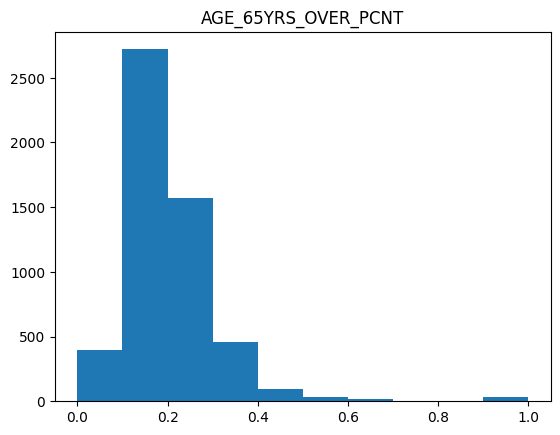

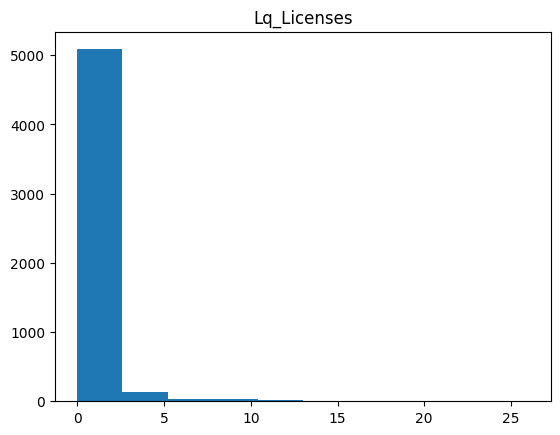

In [ ]:
# Checking mean, median, mode of AGE_65YRS_OVER_PCNT to determine imputation value
missing_impute_targets = ['AGE_65YRS_OVER_PCNT',"Lq_Licenses"]
for target in missing_impute_targets:
  print("The mean of",str(target),"is:",records[target].mean())
  print("The median of",str(target),"is:",records[target].median())
  print("The mode of",str(target),"is:",records[target].mode()[0])
for target in missing_impute_targets:
    plt.hist(records[target])
    plt.title(target)
    plt.show()

In [ ]:
# Impute data using median for both attributes
for target in missing_impute_targets:
  records[target].fillna(records[target].median(), inplace=True)
  print("The number of missing data for",str(target), "left is: ", records[target].isna().sum())

The number of missing data for AGE_65YRS_OVER_PCNT left is:  0
The number of missing data for Lq_Licenses left is:  0


#### 2.2.2. Data Type Transformation

In [ ]:
# inspect data values and types
print(records.dtypes)
print(records.sample(5))

EZI_ROAD_NAME                       object
ROAD_NAME                           object
ROAD_TYPE                           object
AGE_LESS_THAN_15YRS_PCNT           float64
AGE_15_24YRS_PCNT                  float64
AGE_25_44YRS_PCNT                  float64
AGE_45_64YRS_PCNT                  float64
AGE_18YRS_OVER_PCNT                float64
AGE_65YRS_OVER_PCNT                float64
SEO_PERSONS_PCNT                   float64
FC_COUPLE_NO_CHILDREN_PCNT         float64
FC_COUPLE_WITH_CHILDREN_PCNT       float64
FC_SINGLE_PARENT                   float64
CARS_ZERO_HH_PCNT                  float64
CARS_ONE_HH_PCNT                   float64
CARS_TWO_OR_MORE_HH_PCNT           float64
DWELLING_SEP_HOUSE_PCNT            float64
DWELLING_SEMID_RO_OR_TCE_H_TH_P    float64
DWELLING_FLAT_UNIT_APART_PCNT      float64
OCCUPATION_WHITE_COLLAR_PCNT       float64
OCCUPATION_BLUE_COLLAR_PCNT        float64
SEIFA                                int64
Commercial%                        float64
Industrial%

In [ ]:
# Check for data consistency in binominal data columns
print(records['Intersection'].unique())
print(records['Blackspot'].unique())

['non-Intersection' 'Intersection']
['Blackspot' 'non-Blackspot']


In [ ]:
# Convert categorical data to numerical
## Intersection column conversion
def coding_intersection(x):
    if x=='Intersection': return 1
    if x=='non-Intersection': return 0

records['Intersection'] = records['Intersection'].apply(coding_intersection)

print(records['Intersection'].sample(10))
## Blackspot column conversion
def coding_blackspot(x):
    if x=='Blackspot': return 1
    if x=='non-Blackspot': return 0

records['Blackspot'] = records['Blackspot'].apply(coding_blackspot)

print(records['Blackspot'].sample(10))

1347    0
1975    0
863     0
1219    0
4037    0
2649    0
459     0
3144    0
2202    0
3831    0
Name: Intersection, dtype: int64
4250    0
3780    0
769     0
2648    1
1994    0
135     0
2842    0
1168    0
4880    0
432     1
Name: Blackspot, dtype: int64


In [ ]:
# Suspect integer datatype for Lq_Licenses; check values to affirm
print(records['Lq_Licenses'].value_counts())

0.0     4644
1.0      332
2.0      117
3.0       71
4.0       38
5.0       26
6.0       23
9.0       15
7.0       13
8.0       10
11.0       9
12.0       7
10.0       5
13.0       5
15.0       3
18.0       2
21.0       1
22.0       1
14.0       1
20.0       1
26.0       1
24.0       1
Name: Lq_Licenses, dtype: int64


In [ ]:
# Clean data by roundding up values for Lq_Licenses to avoid errors and transform to int64
records['Lq_Licenses']=records['Lq_Licenses'].round()
records['Lq_Licenses']=records['Lq_Licenses'].astype('int64')
print(records['Lq_Licenses'].value_counts())

0     4644
1      332
2      117
3       71
4       38
5       26
6       23
9       15
7       13
8       10
11       9
12       7
10       5
13       5
15       3
18       2
21       1
22       1
14       1
20       1
26       1
24       1
Name: Lq_Licenses, dtype: int64


In [ ]:
# Check for data types of entire record again
print(records.dtypes)

EZI_ROAD_NAME                       object
ROAD_NAME                           object
ROAD_TYPE                           object
AGE_LESS_THAN_15YRS_PCNT           float64
AGE_15_24YRS_PCNT                  float64
AGE_25_44YRS_PCNT                  float64
AGE_45_64YRS_PCNT                  float64
AGE_18YRS_OVER_PCNT                float64
AGE_65YRS_OVER_PCNT                float64
SEO_PERSONS_PCNT                   float64
FC_COUPLE_NO_CHILDREN_PCNT         float64
FC_COUPLE_WITH_CHILDREN_PCNT       float64
FC_SINGLE_PARENT                   float64
CARS_ZERO_HH_PCNT                  float64
CARS_ONE_HH_PCNT                   float64
CARS_TWO_OR_MORE_HH_PCNT           float64
DWELLING_SEP_HOUSE_PCNT            float64
DWELLING_SEMID_RO_OR_TCE_H_TH_P    float64
DWELLING_FLAT_UNIT_APART_PCNT      float64
OCCUPATION_WHITE_COLLAR_PCNT       float64
OCCUPATION_BLUE_COLLAR_PCNT        float64
SEIFA                                int64
Commercial%                        float64
Industrial%

### 2.3. Univariate Analysis

#### 2.3.1. Numerical data

In [ ]:
#Inspect numerical data
pd.set_option('display.max_columns', None)
records.describe(include=['float64','int64'])

,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,DWELLING_SEP_HOUSE_PCNT,DWELLING_SEMID_RO_OR_TCE_H_TH_P,DWELLING_FLAT_UNIT_APART_PCNT,OCCUPATION_WHITE_COLLAR_PCNT,OCCUPATION_BLUE_COLLAR_PCNT,SEIFA,Commercial%,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
count,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000
mean,0.175456,0.099507,0.202988,0.306965,0.774056,0.202494,0.884964,0.443514,0.401426,0.127184,0.026994,0.252862,0.670384,0.937444,0.025734,0.014431,0.625507,0.339552,972.064026,0.022016,0.009862,0.393237,0.137413,0.375253,0.377582,0.125235,0.012580,0.025535,0.004506,0.127488,0.022343,0.106459
std,0.050574,0.030945,0.054621,0.067690,0.102008,0.105131,0.107473,0.105680,0.114858,0.066078,0.036596,0.125073,0.172008,0.147755,0.066977,0.046904,0.112935,0.082726,146.023551,0.105801,0.070263,0.413405,0.277777,0.431760,1.550144,0.331016,0.111462,0.157758,0.066983,0.333550,0.147811,0.308453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144847,0.079897,0.172337,0.274064,0.751515,0.149367,0.870588,0.387283,0.342105,0.076923,0.000000,0.155963,0.563107,0.955056,0.000000,0.000000,0.578947,0.292210,944.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.177419,0.102041,0.197248,0.317073,0.778723,0.181102,0.896985,0.450000,0.406977,0.125000,0.015873,0.220526,0.715976,1.000000,0.000000,0.000000,0.638554,0.347305,1001.000000,0.000000,0.000000,0.226550,0.000000,0.081297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.205817,0.123007,0.234266,0.348189,0.816156,0.237288,0.927536,0.500000,0.477124,0.169355,0.041667,0.356907,0.803922,1.000000,0.017751,0.000000,0.689815,0.392857,1035.000000,0.000000,0.000000,0.832911,0.114782,0.962690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.329241,0.198113,0.608696,0.490798,1.000000,1.000000,1.000000,1.088235,0.785714,0.500000,0.289720,0.666667,0.936508,1.000000,0.722420,0.668016,1.100000,0.588710,1149.000000,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Inspect variables with max value over 1
records[['FC_COUPLE_NO_CHILDREN_PCNT','OCCUPATION_WHITE_COLLAR_PCNT']].describe()

,FC_COUPLE_NO_CHILDREN_PCNT,OCCUPATION_WHITE_COLLAR_PCNT
count,5326.000000,5326.000000
mean,0.443514,0.625507
std,0.105680,0.112935
min,0.000000,0.000000
25%,0.387283,0.578947
50%,0.450000,0.638554
75%,0.500000,0.689815
max,1.088235,1.100000


In [ ]:
# Inspect FC_COUPLE_NO_CHILDREN_PCNT due to having values over 1
records['FC_COUPLE_NO_CHILDREN_PCNT'].sort_values(ascending=False)

4728    1.088235
2602    0.720721
666     0.720721
1599    0.720721
3245    0.720721
          ...   
2422    0.000000
1496    0.000000
4839    0.000000
117     0.000000
2901    0.000000
Name: FC_COUPLE_NO_CHILDREN_PCNT, Length: 5326, dtype: float64

In [ ]:
# Inspect OCCUPATION_WHITE_COLLAR_PCNT due to having values over 1
records['OCCUPATION_WHITE_COLLAR_PCNT'].sort_values(ascending=False)

4728    1.100000
5224    0.837209
4884    0.837209
194     0.837209
4315    0.837209
          ...   
2974    0.000000
232     0.000000
2762    0.000000
571     0.000000
837     0.000000
Name: OCCUPATION_WHITE_COLLAR_PCNT, Length: 5326, dtype: float64

In [ ]:
# Dropping row with erroneous values
records = records.drop(records.index[4728])

In [ ]:
# Checking data after deleting
print('Shape of dataset after removing faulty entry is',records.shape)
print('Stats on affected variable after removal:')
records[['FC_COUPLE_NO_CHILDREN_PCNT','OCCUPATION_WHITE_COLLAR_PCNT']].describe()

Shape of dataset after removing faulty entry is (5325, 35)
Stats on affected variable after removal:


,FC_COUPLE_NO_CHILDREN_PCNT,OCCUPATION_WHITE_COLLAR_PCNT
count,5325.000000,5325.000000
mean,0.443393,0.625418
std,0.105320,0.112759
min,0.000000,0.000000
25%,0.387283,0.578947
50%,0.450000,0.638554
75%,0.500000,0.689815
max,0.720721,0.837209


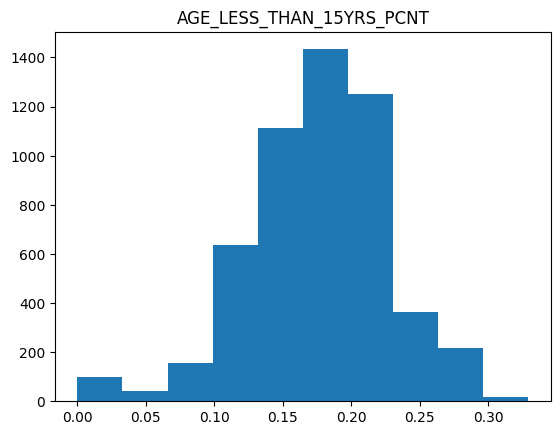

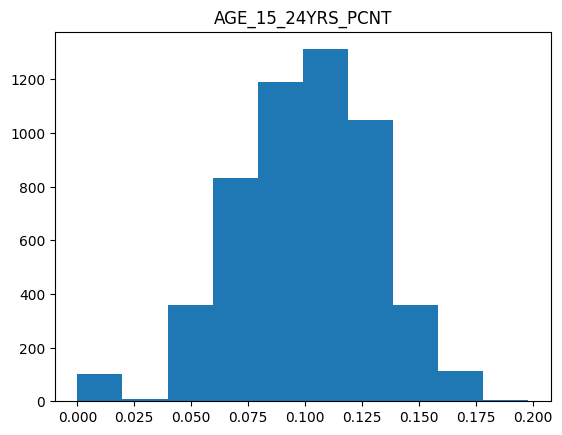

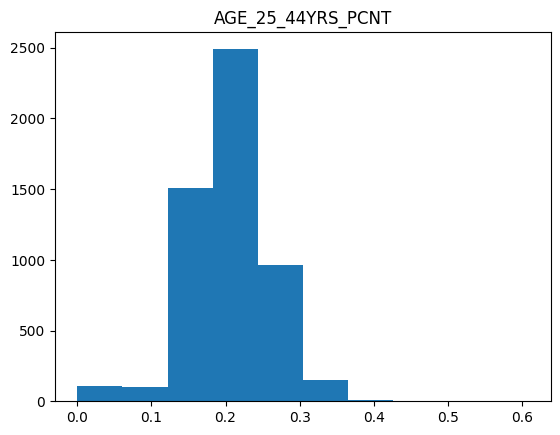

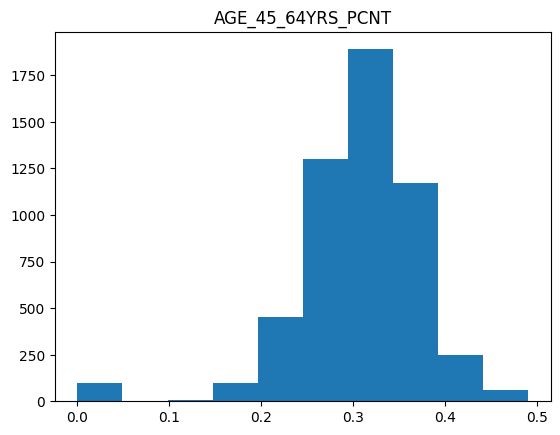

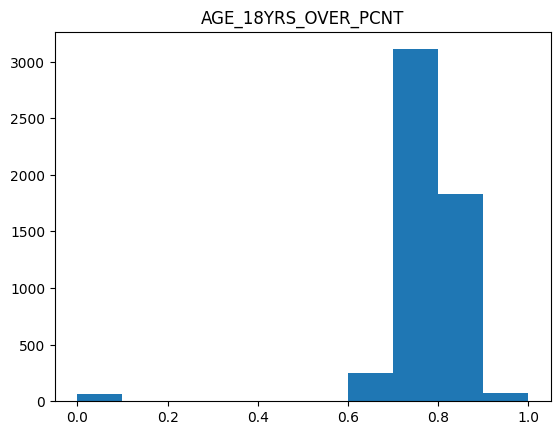

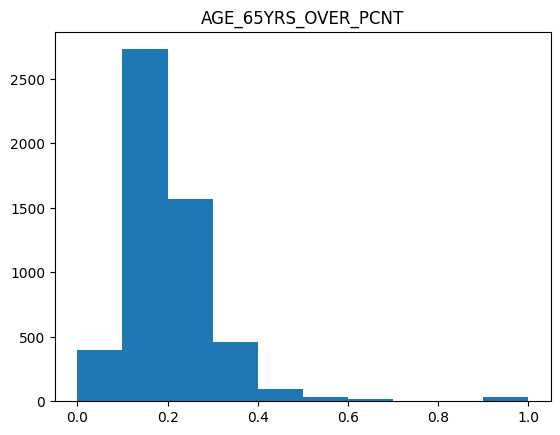

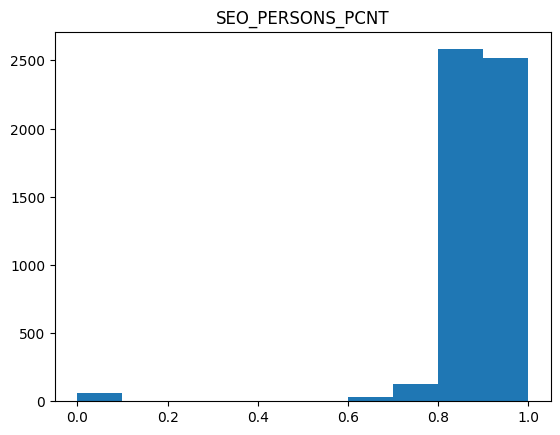

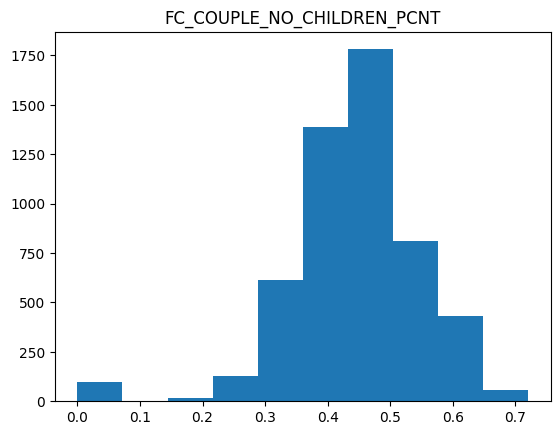

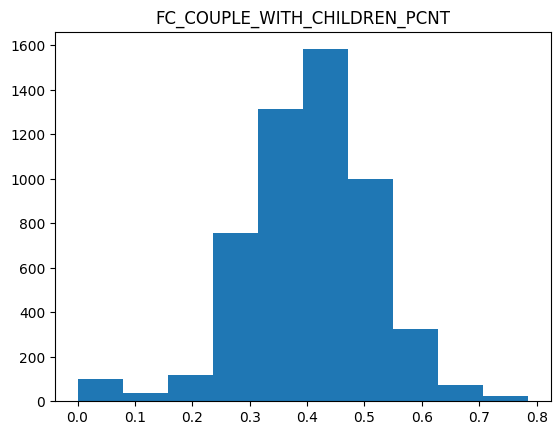

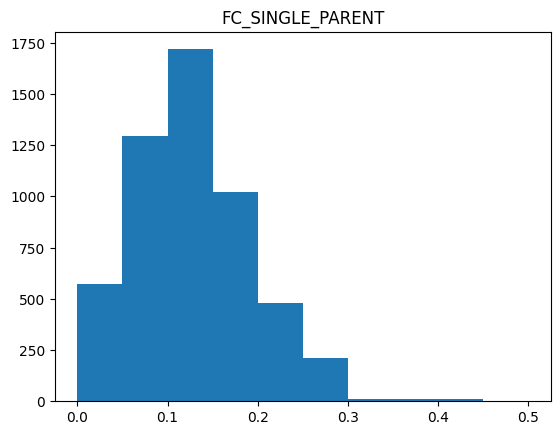

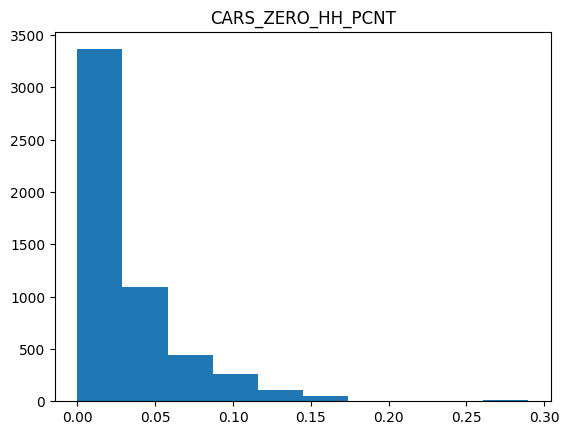

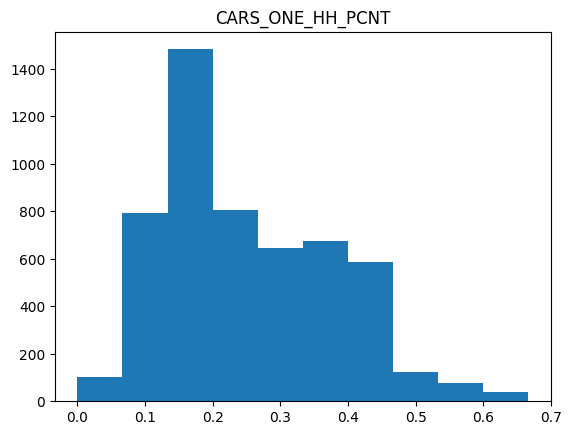

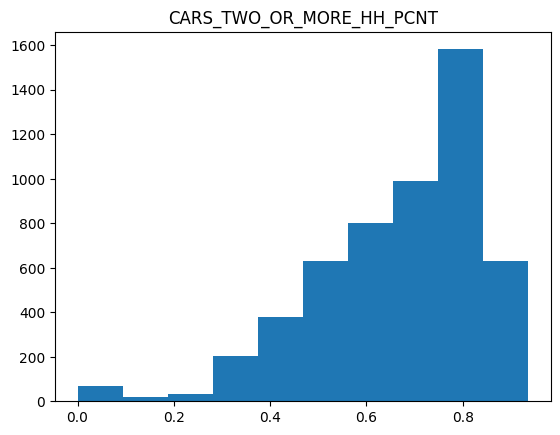

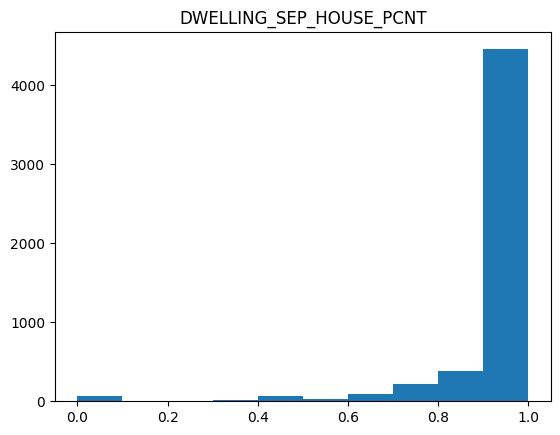

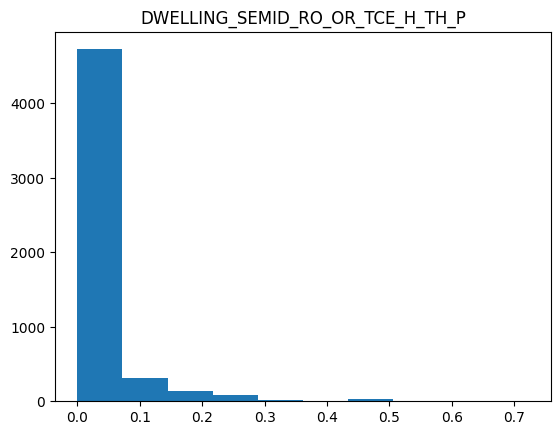

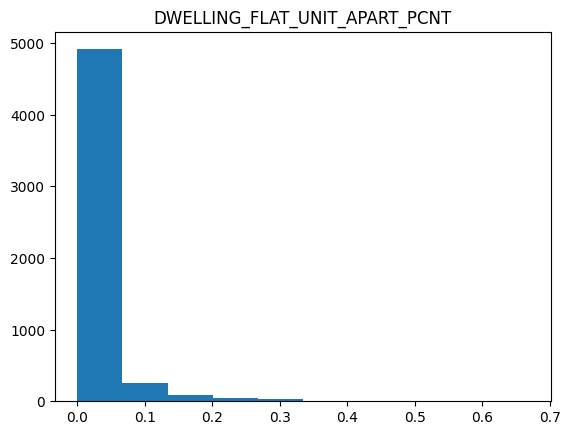

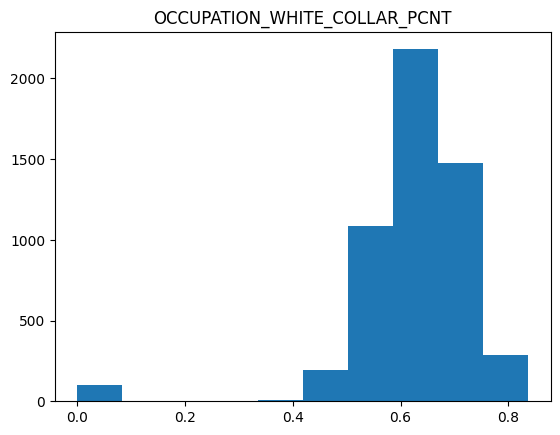

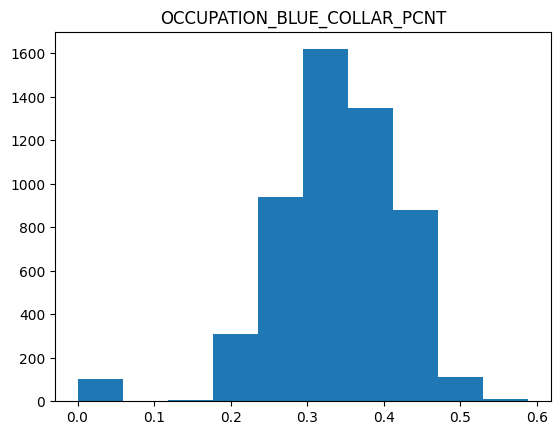

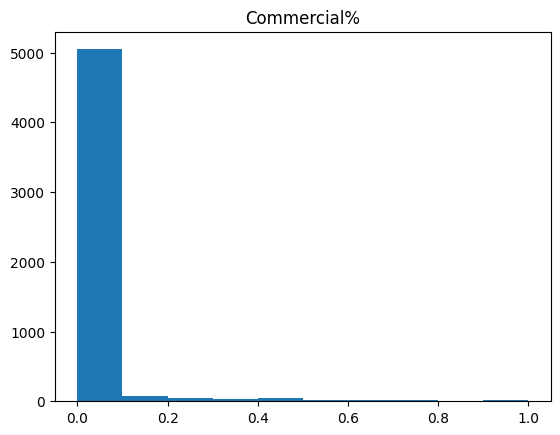

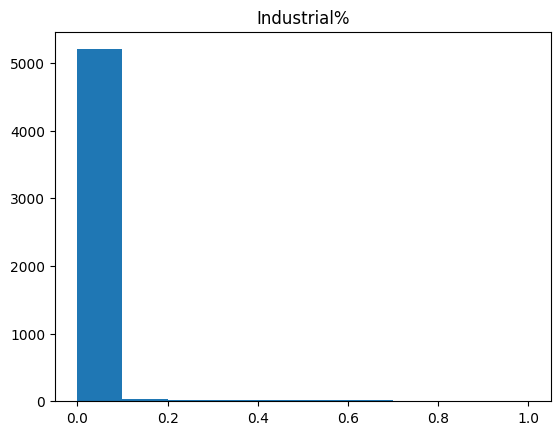

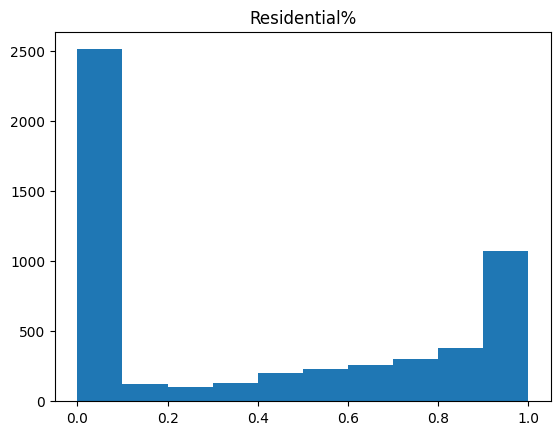

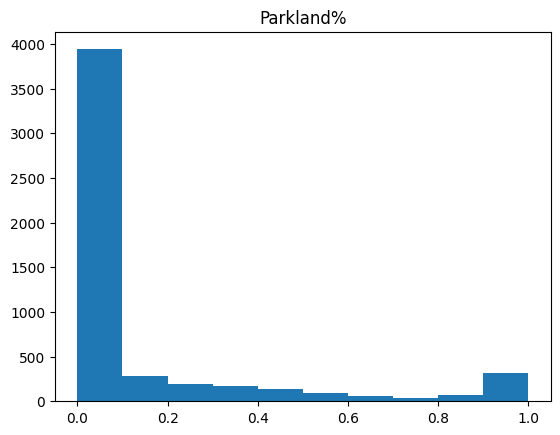

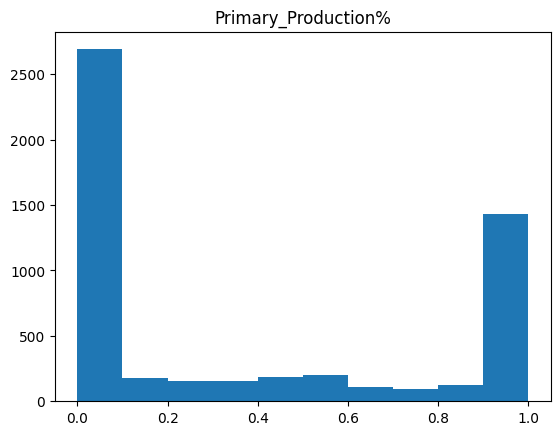

In [ ]:
#Visualize data into histogram to study distribution (data in percentage representation only)
for i in records.select_dtypes(include=['float64']).columns:
    plt.hist(records[i])
    plt.title(i)
    plt.show()

In [ ]:
#Inspect discrete numerical data
records.describe(include='int64')

,SEIFA,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
count,5325.000000,5325.000000,5325.00000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000
mean,972.056526,0.377653,0.12507,0.012582,0.025540,0.004507,0.127512,0.022347,0.106479
std,146.036239,1.550281,0.33083,0.111473,0.157773,0.066989,0.333577,0.147825,0.308479
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,944.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1035.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1149.000000,26.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


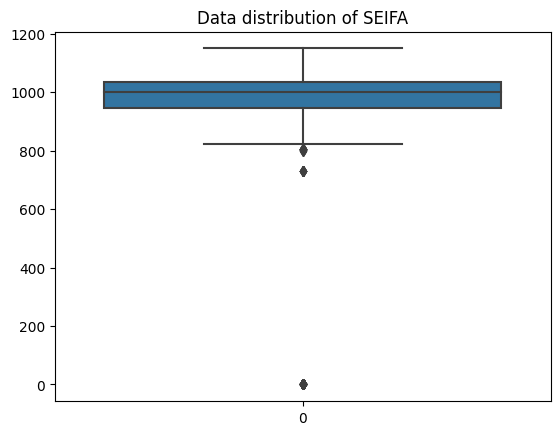

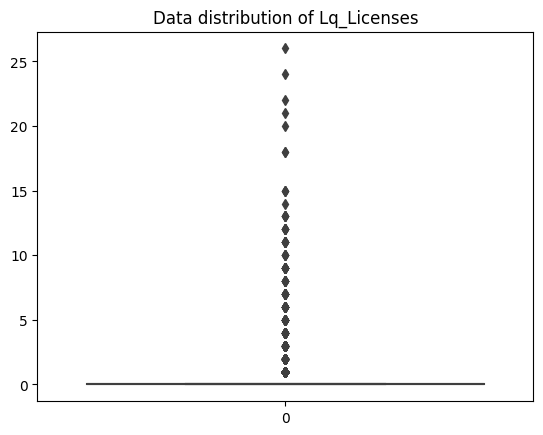

In [ ]:
# Checking data distribution of SEIFA
sns.boxplot(records['SEIFA'])
plt.title('Data distribution of SEIFA')
plt.show()
sns.boxplot(records['Lq_Licenses'])
plt.title('Data distribution of Lq_Licenses')
plt.show()

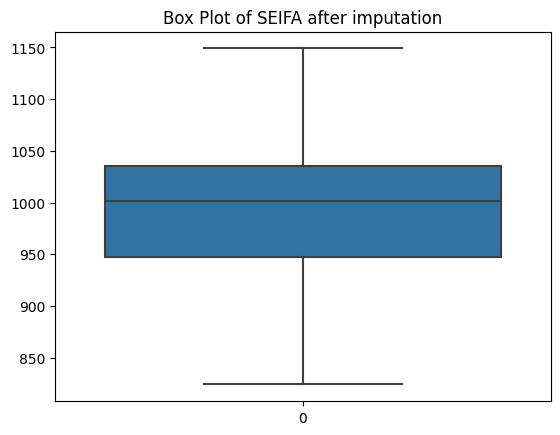

In [ ]:
# Treating outliers in SEIFA with imputation (using median to avoid outlier)
for i in records['SEIFA']:
  q1 = records['SEIFA'].quantile(0.25)
  q3 = records['SEIFA'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5*iqr
  Upper_tail = q3 + 1.5*iqr
  if i > Upper_tail or i < Lower_tail:
    records['SEIFA'] = records['SEIFA'].replace(i, np.median(records['SEIFA']))
sns.boxplot(records['SEIFA'])
plt.title("Box Plot of SEIFA after imputation")
plt.show()

In [ ]:
# Checking data stats after imputation
print(records['SEIFA'].describe())

count    5325.000000
mean      991.620094
std        58.044137
min       824.000000
25%       947.000000
50%      1001.000000
75%      1035.000000
max      1149.000000
Name: SEIFA, dtype: float64


In [ ]:
# Examining data distribution of Lq_Licenses
print(records['Lq_Licenses'].value_counts())
records['Lq_Licenses'].describe()

0     4643
1      332
2      117
3       71
4       38
5       26
6       23
9       15
7       13
8       10
11       9
12       7
10       5
13       5
15       3
18       2
21       1
22       1
14       1
20       1
26       1
24       1
Name: Lq_Licenses, dtype: int64


count    5325.000000
mean        0.377653
std         1.550281
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: Lq_Licenses, dtype: float64

In [ ]:
# Calculate percentage of rows with Lq_Licenses having value of 0
e = records.loc[records['Lq_Licenses'] == 0].shape[0]/records.shape[0]
e

0.871924882629108

#### 2.3.2. Categorical Data

In [ ]:
#Inspect categorical data
records.describe(include='object')

,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE
count,5325,5325,5325
unique,2185,2020,6
top,BASS HIGHWAY,PRINCES,ROAD
freq,52,75,3399


ROAD       0.6383
STREET     0.2486
DRIVE      0.0554
HIGHWAY    0.0338
WAY        0.0145
FREEWAY    0.0094
Name: ROAD_TYPE, dtype: float64

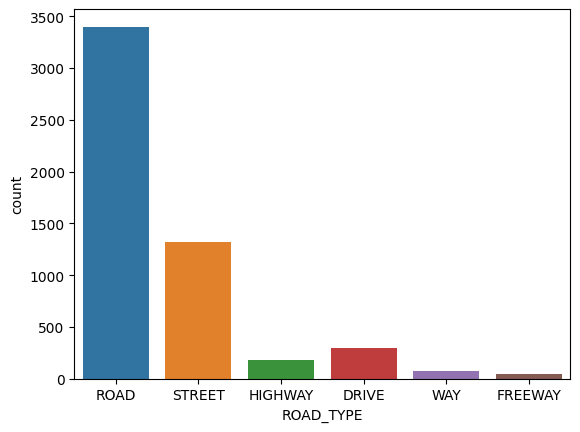

In [ ]:
#Inspect data distribution of ROAD_TYPE with bar chart
sns.countplot(data=records, x='ROAD_TYPE')
records['ROAD_TYPE'].value_counts(normalize=True).round(4)

In [ ]:
pd.get_dummies(records['ROAD_TYPE'])

,DRIVE,FREEWAY,HIGHWAY,ROAD,STREET,WAY
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
5321,0,0,0,1,0,0
5322,0,0,1,0,0,0
5323,0,0,0,1,0,0
5324,0,0,0,1,0,0


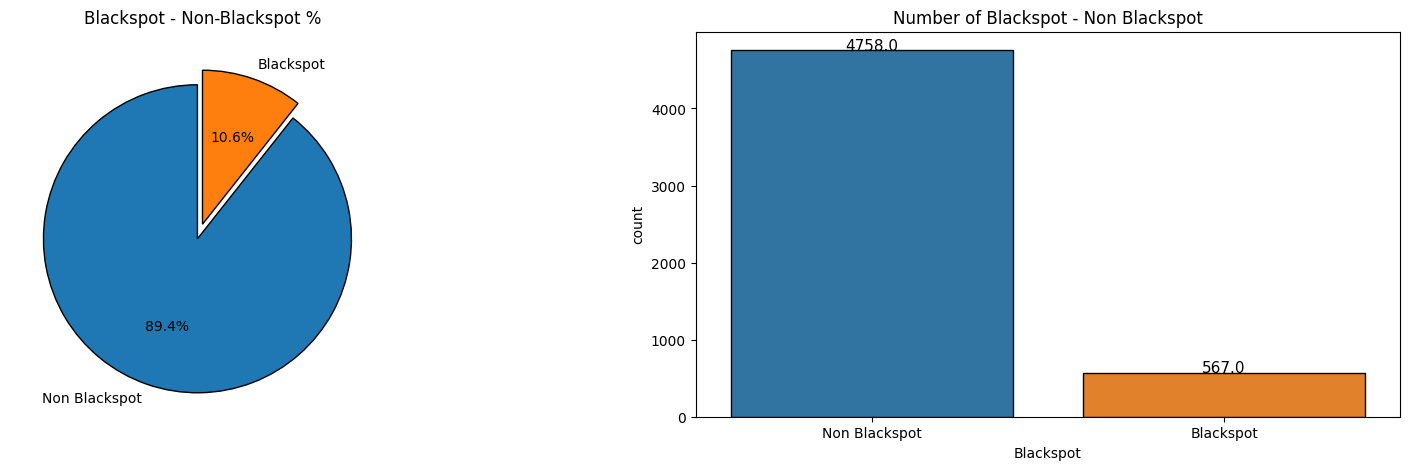

In [ ]:
# Investigate distribution of label data - Blackspot
l = list(records['Blackspot'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Non Blackspot','Blackspot'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Blackspot - Non-Blackspot %');

plt.subplot(1,2,2)
ax = sns.countplot(x='Blackspot',data = records,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Non Blackspot','Blackspot'])

plt.title('Number of Blackspot - Non Blackspot');
plt.show()

### 2.4. Bivariate Analysis

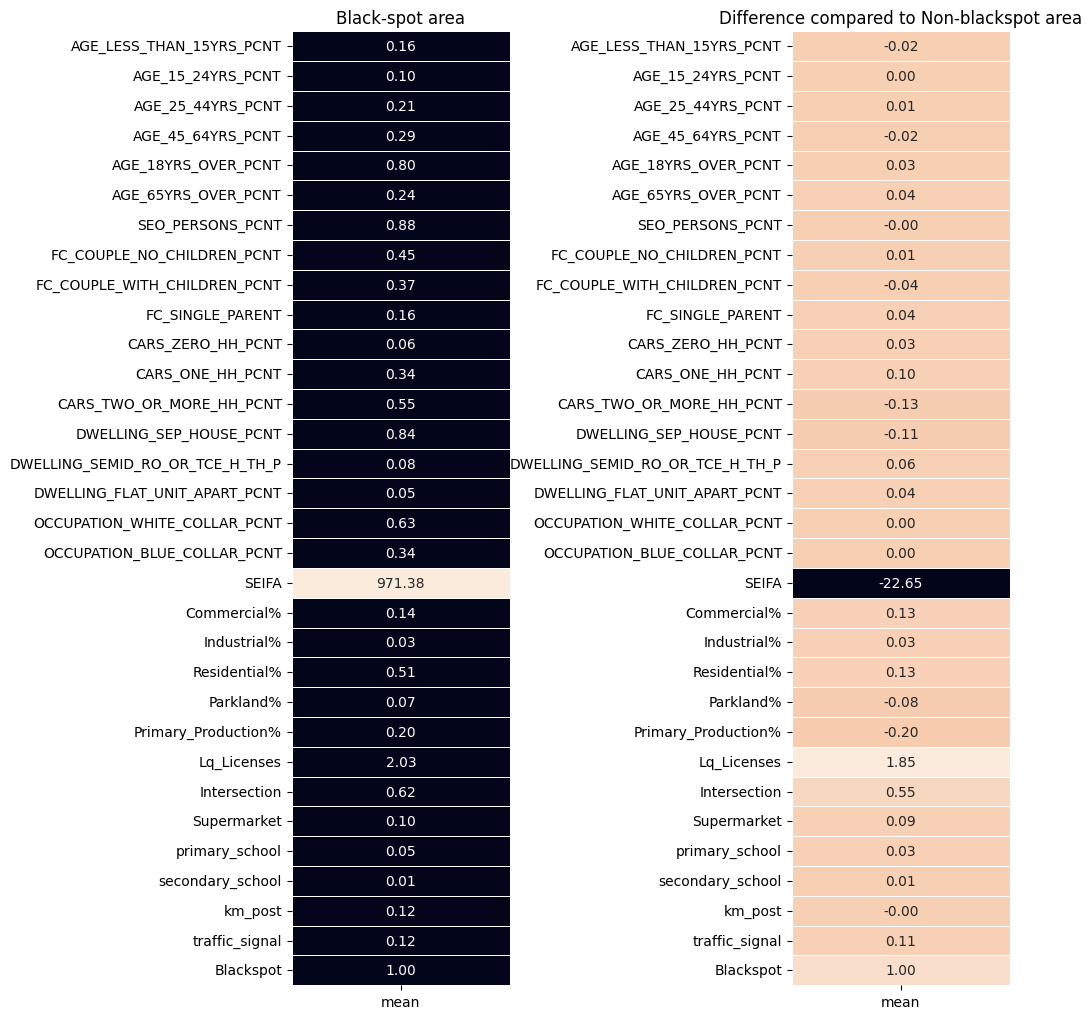

In [ ]:
# Investigate relationship between predictors and the label using mean, group by label value
blackspot = records[records['Blackspot'] == 1].describe().T
nonblackspot = records[records['Blackspot'] == 0].describe().T
diff   = (blackspot[['mean']] - nonblackspot[['mean']])

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(blackspot[['mean']],annot = True,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f', xticklabels=True, yticklabels=True)
plt.title('Black-spot area');

plt.subplot(1,2,2)
sns.heatmap(diff,annot = True,linewidths = 0.4,linecolor = 'white',cbar = False,fmt = '.2f', xticklabels=True, yticklabels=True)
plt.title('Difference compared to Non-blackspot area');

fig.tight_layout(pad = 0)

<ipython-input-609-eba1aaa5520d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = records.corr()


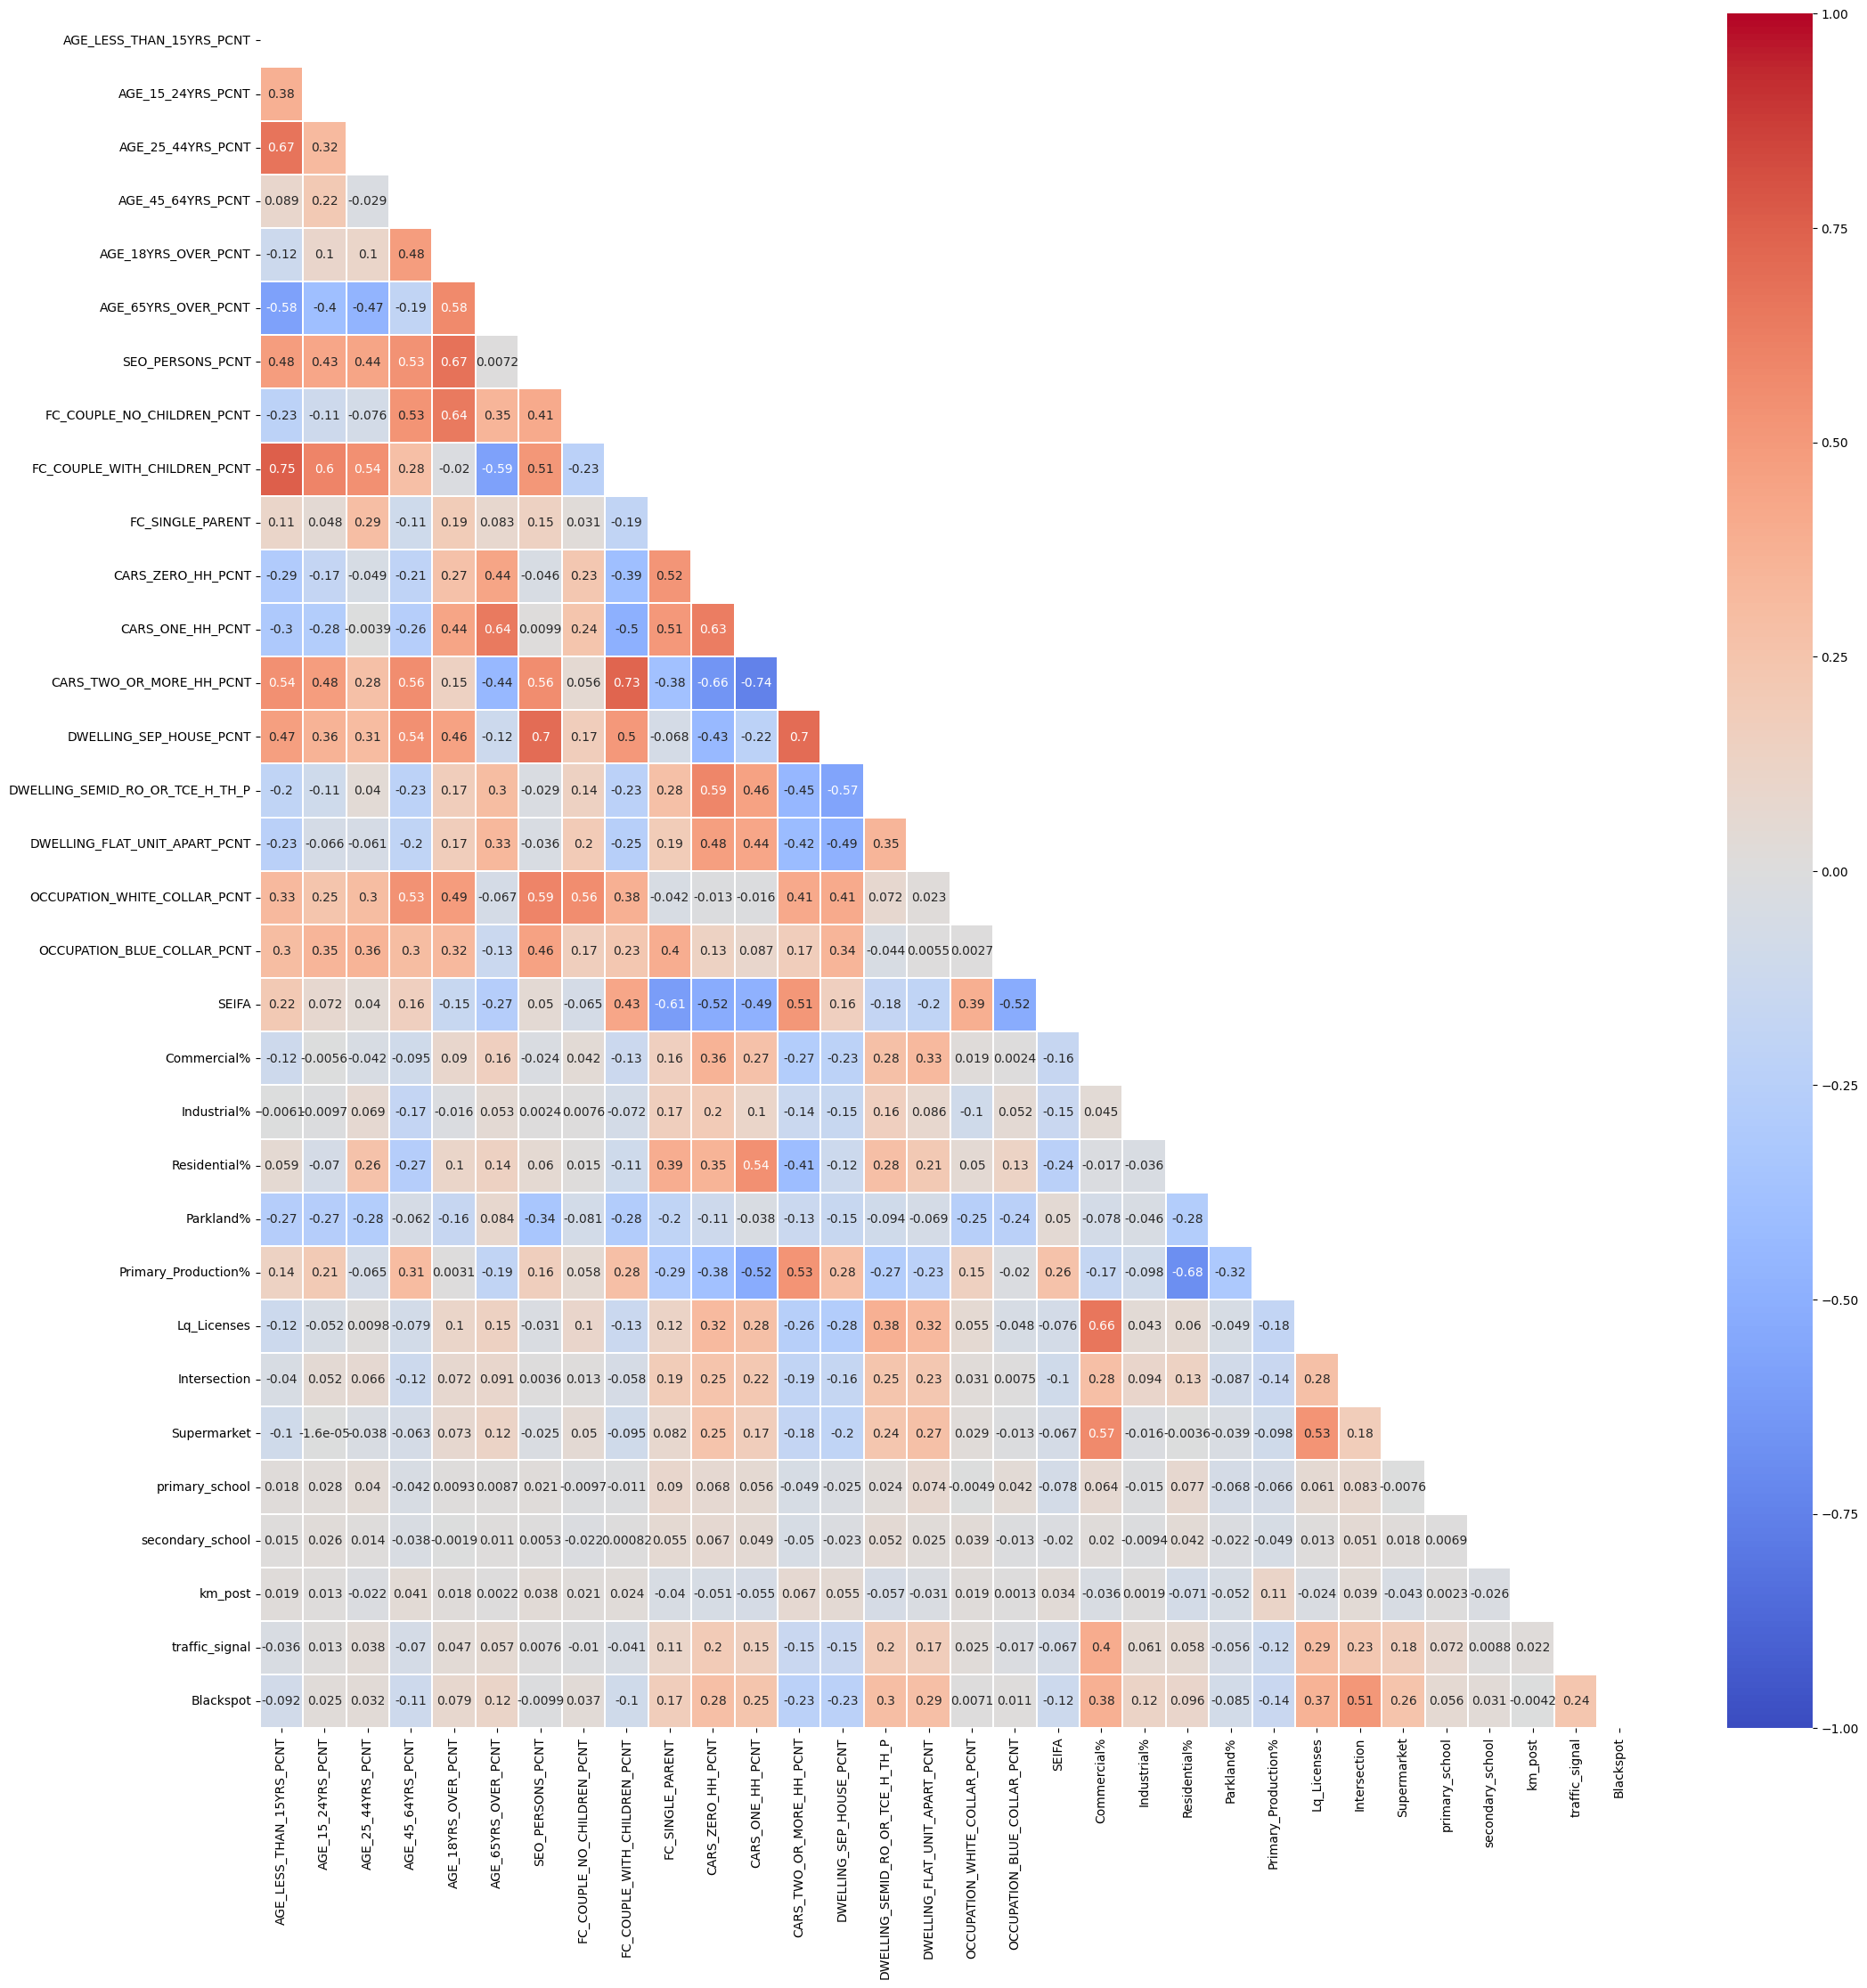

In [ ]:
# Create heatmap of correlation between variables
plt.figure(figsize=(25, 25))

corr = records.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

### 3.1. Split data set and set label/features

In [ ]:
#Selecting predictors/features
features = ['Intersection','Lq_Licenses','CARS_ZERO_HH_PCNT','traffic_signal','AGE_65YRS_OVER_PCNT']

#complete the code below
X = records[features]
y = records.Blackspot

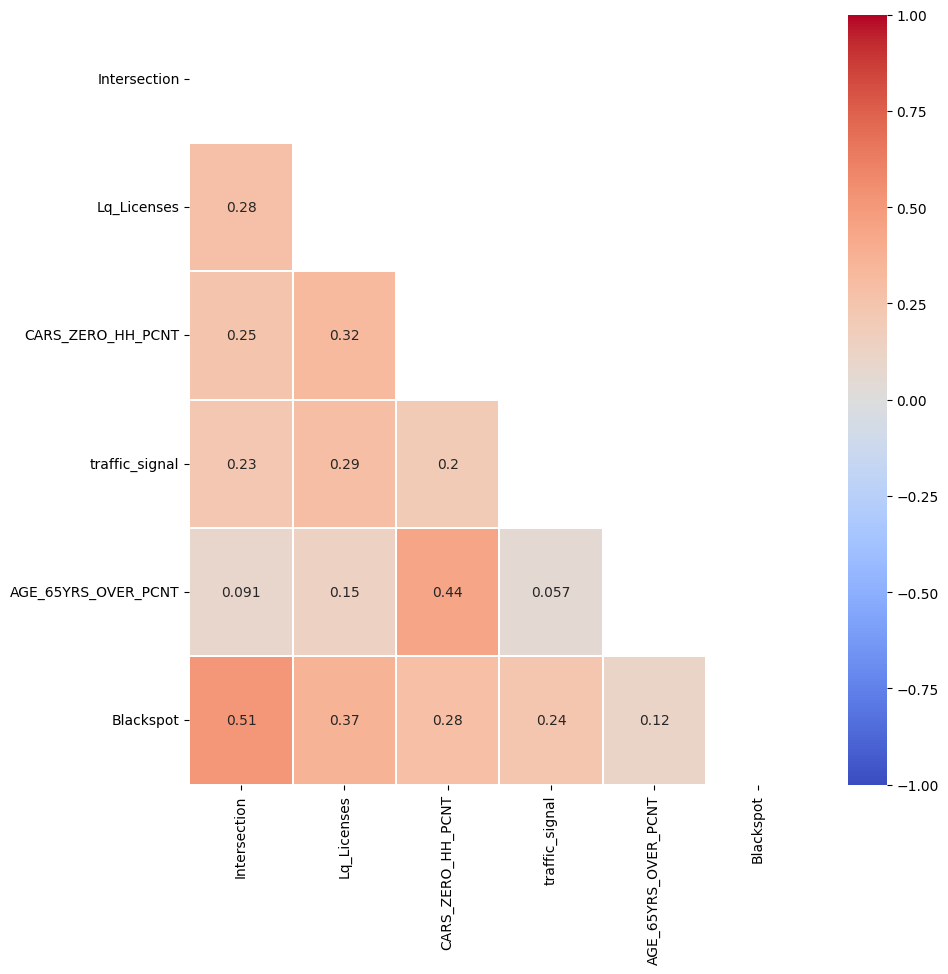

In [ ]:
# Examine correlation between chosen variables
features4heatmap = ['Intersection','Lq_Licenses','CARS_ZERO_HH_PCNT','traffic_signal','AGE_65YRS_OVER_PCNT','Blackspot']
plt.figure(figsize=(10, 10))

corr = records[features4heatmap].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing

In [ ]:
#inspect the split datasets
print('Shape of the trainset is:')
print(X_train.shape)
print('Shape of the testset is:')
print(X_test.shape)

Shape of the trainset is:
(4260, 5)
Shape of the testset is:
(1065, 5)


### 3.2. Logistic Regresion Model

In [ ]:
# Rescale large integer data
mms = MinMaxScaler() # Normalization
records['Lq_Licenses'] = mms.fit_transform(records[['Lq_Licenses']])

In [ ]:
#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

In [ ]:
# Train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)

In [ ]:
#Make predictions for the test dataset
y_pred = logreg.predict(X_test)

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,Intersection,Lq_Licenses,CARS_ZERO_HH_PCNT,traffic_signal,AGE_65YRS_OVER_PCNT,Actual,Predicted
4971,0,0,0.016949,0,0.264317,0,0
2701,0,0,0.000000,0,0.102689,0,0
3369,1,8,0.069620,0,0.171795,1,1
501,1,0,0.092683,0,0.272109,0,0
2603,0,0,0.068493,0,0.320783,0,0
988,0,0,0.062762,0,0.179365,0,0
2633,0,0,0.000000,0,0.250000,0,0
119,0,5,0.109312,0,0.234646,0,0
3770,0,0,0.000000,0,0.194286,0,0
3224,0,0,0.000000,0,0.251412,0,0


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


### 4.1. Accuracy, Precision, Recall, F1

In [ ]:
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9070422535211268
Precision:  0.7
Recall:  0.34146341463414637
F1:  0.4590163934426229


In [ ]:
#print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[924  18]
 [ 81  42]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       942
           1       0.70      0.34      0.46       123

    accuracy                           0.91      1065
   macro avg       0.81      0.66      0.70      1065
weighted avg       0.89      0.91      0.89      1065



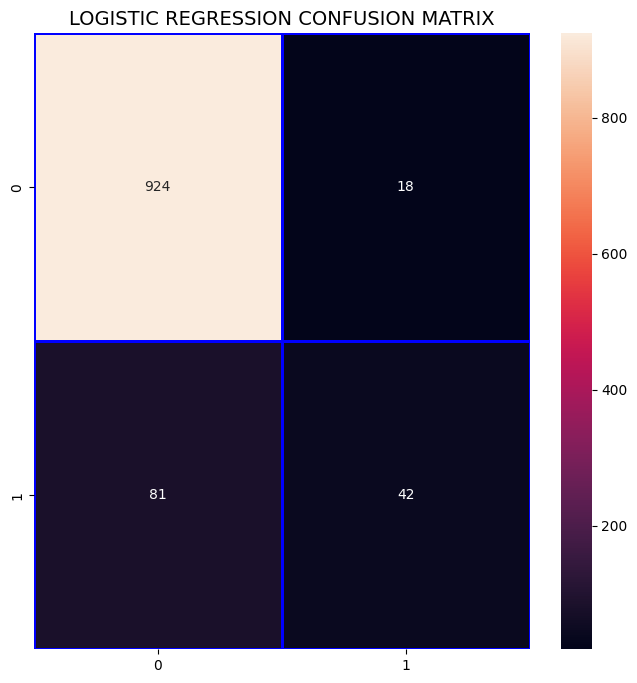

In [ ]:
# Confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="blue",linewidths=2)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

### 4.2. ROC Curve and confusion matrix

In [ ]:
# Pobabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)
print(probabilities)

[[0.95772813 0.04227187]
 [0.96647864 0.03352136]
 [0.13910216 0.86089784]
 ...
 [0.89525229 0.10474771]
 [0.95404354 0.04595646]
 [0.94390523 0.05609477]]


In [ ]:
# Probabilities for the positive class (Blackspot)
y_prob = probabilities[:, 1]
print(y_prob)

[0.04227187 0.03352136 0.86089784 ... 0.10474771 0.04595646 0.05609477]


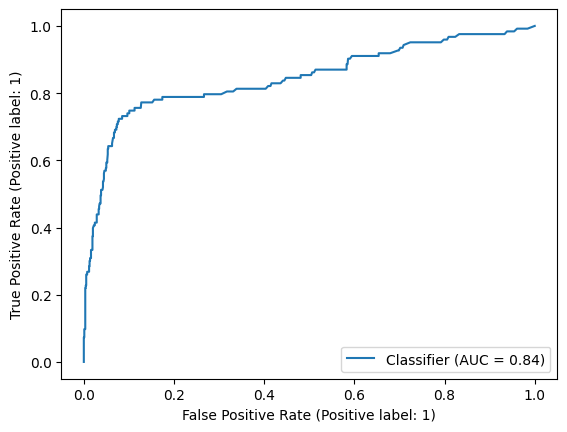

In [ ]:
# RocCurve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

Best thredshold 0.07274057806107256


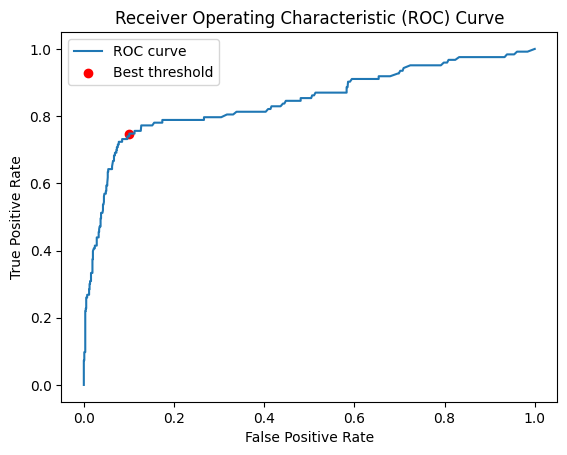

In [ ]:
# Determining best threshold based on distance between TPR and FPR
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Find best threshold based on the distance between tpr - fpr
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]
print('Best thredshold', best_threshold)
# plot the ROC curve and the best point
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o',
color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Axes(0.125,0.11;0.775x0.77)
Intersection           2.722216
Lq_Licenses            0.272321
CARS_ZERO_HH_PCNT      2.892286
traffic_signal         0.905462
AGE_65YRS_OVER_PCNT    1.187992
dtype: float64


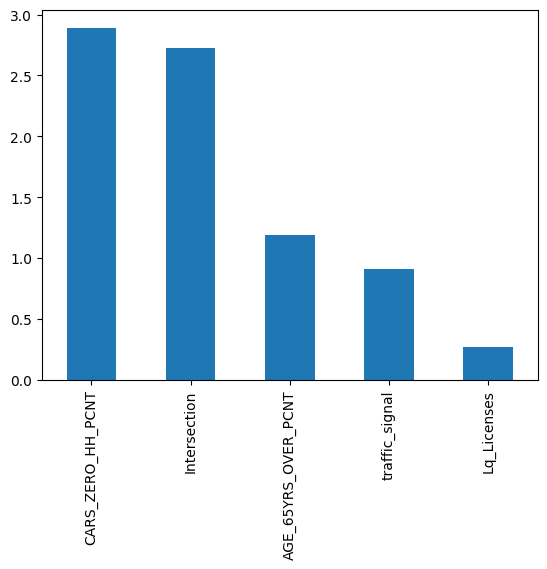

In [ ]:
#Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))
print(coefs)

In [ ]:
#Print the model formula
print('Blackspot= ', '%.3f' % intercept, '+', '%.3f' %coef[0], '*Intersection', '+', '%.3f' %coef[1], '*Lq_Licenses', '+', '%.3f' %coef[2], '*CARS_ZERO_HH_PCNT', '+', '%.3f' %coef[3], '*traffic_signal' '+', '%.3f' %coef[4], '*AGE_65YRS_OVER_PCNT')

Blackspot=  -3.469 + 2.739 *Intersection + 4.314 *Lq_Licenses + 3.317 *CARS_ZERO_HH_PCNT + 1.088 *traffic_signal+ 1.321 *AGE_65YRS_OVER_PCNT
